# Confirm that boxes are still drawn correctly

In [49]:
from train import Dataset, DataLoader, Model
from torchvision import transforms
import cv2
import numpy as np
import matplotlib.patches as patches

In [2]:
dataset_dir = '../all_border_dataset_2000_annotations_split'
train_dataset = Dataset(f'{dataset_dir}/train/')
val_dataset = Dataset(f'{dataset_dir}/val/')

loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
model = Model(['border'])

In [4]:
def unnormalise(x):
    return transforms.Normalize(mean=[(-0.485/0.229), (-0.456/0.224), (-0.406/0.225)], std=[1/0.229, 1/0.224, 1/0.225]).forward(x)

In [21]:
image = np.moveaxis(unnormalise(train_dataset[0][0]).numpy(), 0, -1)
image.shape

(514, 400, 3)

In [35]:
a, b, c, d = train_dataset[0][1]['boxes'][0]
a, b, c, d = a.item(), b.item(), c.item(), d.item()

In [46]:
e, f, g, h = train_dataset[0][1]['boxes'][1]
e, f, g, h = e.item(), f.item(), g.item(), h.item()

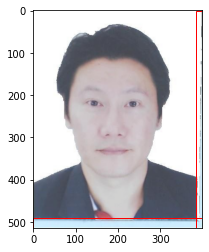

In [48]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Create a Rectangle patch
rect1 = patches.Rectangle((a, b), c-a, d-b, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((e, f), g-e, h-f, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)

# Possible error: normalise is not having the correct mean and std

In [1]:
import os 

train_dataset_dir = '../all_border_dataset_2000_annotations_split/train'
files = os.listdir(train_dataset_dir)
jpg_files = [f for f in files if f[-4:] == '.jpg']

In [2]:
from utils import read_image
from torchvision import transforms

default = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
default(read_image(f'{train_dataset_dir}/{jpg_files[0]}')).shape

torch.Size([3, 514, 400])

In [3]:
import torch
from tqdm import tqdm

t = transforms.ToTensor()
first_channels = []

for i in tqdm(range(len(jpg_files))):
    first_channel = t(read_image(f'{train_dataset_dir}/{jpg_files[i]}'))[0].reshape(-1)
    first_channels.append(first_channel)
    
first = torch.cat(first_channels)
first.mean(), first.std()

100%|██████████████████████████████████████████████████████████████████████████████| 1601/1601 [00:09<00:00, 168.50it/s]


(tensor(0.5243), tensor(0.3167))

In [4]:
import torch
from tqdm import tqdm

t = transforms.ToTensor()
second_channels = []

for i in tqdm(range(len(jpg_files))):
    second_channel = t(read_image(f'{train_dataset_dir}/{jpg_files[i]}'))[1].reshape(-1)
    second_channels.append(second_channel)
    
second = torch.cat(second_channels)
second.mean(), second.std()

100%|██████████████████████████████████████████████████████████████████████████████| 1601/1601 [00:09<00:00, 175.24it/s]


(tensor(0.5560), tensor(0.3119))

In [ ]:
import torch
from tqdm import tqdm

t = transforms.ToTensor()
third_channels = []

for i in tqdm(range(len(jpg_files))):
    third_channel = t(read_image(f'{train_dataset_dir}/{jpg_files[i]}'))[2].reshape(-1)
    third_channels.append(third_channel)
    
third = torch.cat(third_channels)
third.mean(), third.std()

 43%|██████████████████████████████████                                             | 690/1601 [00:06<00:06, 149.44it/s]